# Telecom Churn - Case Study

<font color='barkgreen'> **Submission by - Angshuman , Gautham, Ravi and JP** </font>

<b>Team Mission</b> : we are working for telecom company and helping them to reduce customer churn, the company need to predict which customers are at high risk of churn.

In this notebook, we will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.



**`Problem Statement`** : In the Indian and the southeast Asian market, approximately 80% of revenue comes from the top 20% customers (called high-value customers). Thus, if we can reduce churn of the high-value customers, we will be able to reduce significant revenue leakage.
In this project, you will define high-value customers based on a certain metric (mentioned later below) and predict churn only on high-value customers.. The company wants to know:
- Which variables are significant in predicting the churn rate of a customer
- Understanding Customer Behaviour During Churn


#### Below are the steps performed on the dataset to derive the appropriate prediction model

>**`Data Understanding`** <br>
>**`Data Quality checks / Data Pre_processing `** <br>
>**`Data Preparation for PCA`** <br>
>**`Exploratory data analysis`** <br>
>**`Principal Component Analysis`** <br>
> **`Model Building & Evaluation - Logistic Regression`** <br>
> **`Model Building & Evaluation - Ramdom Forest`** <br>
> **`Conclusions`** <br>

**Miscelleanous info about notebook:** <br>
*Runtime* -68sec apprx <br>
*Input* - telecom_churn_data.csv <br>
*Attachments* - None <br>


#### Import necessary Python Libraries

In [1]:
import numpy as np
import pandas as pd
from pandas import set_option
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
sns.set_style(style='darkgrid')
plt.style.use('fivethirtyeight')

## Data Understanding
1. Peek your data
2. Dimensions
3. Datatypes (Non-numerical / Numerical)

#### Load the data

In [2]:
telecom = pd.read_csv('telecom_churn_data.csv',encoding='ISO-8859-1',na_values='NA')

#### Peek at your data

In [3]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [4]:
telecom.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


#### Dimensions of the data

In [5]:
telecom.shape

(99999, 226)

In [6]:
telecom.circle_id.value_counts()

109    99999
Name: circle_id, dtype: int64

Notice that we have 99999 observations and 226 columns in the dataset provided

#### Datatypes of the data

In [7]:
print("Total Numerical feats...", len(telecom.select_dtypes(include=[np.number]).columns))
display(telecom.select_dtypes(include=[np.number]).columns)
print(" Total non-numerical feats...", len(telecom.select_dtypes(include=[np.object]).columns))
display(telecom.select_dtypes(include=[np.object]).columns)

Total Numerical feats... 214


Index(['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou',
       'loc_ic_t2o_mou', 'arpu_6', 'arpu_7', 'arpu_8', 'arpu_9', 'onnet_mou_6',
       ...
       'sachet_3g_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9',
       'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g'],
      dtype='object', length=214)

 Total non-numerical feats... 12


Index(['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'last_date_of_month_9', 'date_of_last_rech_6', 'date_of_last_rech_7',
       'date_of_last_rech_8', 'date_of_last_rech_9',
       'date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8', 'date_of_last_rech_data_9'],
      dtype='object')

Notice that data have
-  `214` columns are numerical, `12` are non-numerical in the given dataset
Let's park non-numerical feats if they can help to derive the any new metrics for predicting tyhe churn.  Given that month are considered as primary allocation for churn.  The dates might not be required.

## Data Quality checks / Data Pre Processing
1. Missing data checks / treatment / treating NA values
3. Data duplication
5. Derived Measures


### Missing Data checks

In [8]:
total_records = len(telecom)
print("Total number of  records given in the dataset after removing Current records:", total_records)

Total number of  records given in the dataset after removing Current records: 99999


#### Droping the columns which are having more than 50% missing values

In [9]:
null_features = telecom.isnull().sum()
null_features_perc = null_features[null_features > 0]*100/len(telecom) 
invalid_features_for_dropping = null_features_perc[null_features_perc>50]

In [10]:
invalid_features_for_dropping.index

Index(['date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8', 'date_of_last_rech_data_9',
       'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8',
       'total_rech_data_9', 'max_rech_data_6', 'max_rech_data_7',
       'max_rech_data_8', 'max_rech_data_9', 'count_rech_2g_6',
       'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_2g_9',
       'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8',
       'count_rech_3g_9', 'av_rech_amt_data_6', 'av_rech_amt_data_7',
       'av_rech_amt_data_8', 'av_rech_amt_data_9', 'arpu_3g_6', 'arpu_3g_7',
       'arpu_3g_8', 'arpu_3g_9', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8',
       'arpu_2g_9', 'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8',
       'night_pck_user_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9'],
      dtype='object')

In [11]:
telecom.drop(columns=list(invalid_features_for_dropping.index),axis=0, inplace=True)

#### Treating NA values

In [12]:
telecom.fillna(0,inplace = True)

In [13]:
#print(100*(telecom.isna().sum()/len(telecom.index)))

#### Droping the non-numerical feats

In [14]:
non_numericals = telecom.select_dtypes(include=[np.object]).columns

In [15]:
non_numericals

Index(['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'last_date_of_month_9', 'date_of_last_rech_6', 'date_of_last_rech_7',
       'date_of_last_rech_8', 'date_of_last_rech_9'],
      dtype='object')

In [16]:
telecom.drop(columns=list(non_numericals),axis=0, inplace=True)

In [17]:
telecom.shape

(99999, 178)

#### Data Duplication checks

In [18]:
len(telecom.drop_duplicates())

99999

No duplications seen in the data

## Data Preparation for PCA

This is one of the most important parts of data preparation since good features are often the differentiators between good and bad models. Use your business understanding to derive features you think could be important indicators of churn.

We noticed of the 4 months data, the first 3 months are good predictors to get the churn customer rate.  Hence, we decided to average the 3 months of numerical variables

- Deriving churn customer (direct churn)
- Reducing the features by averaging the monthly columns
- Deriving high value customers :  This has to be done by looking at 70th percentile of recharge amount over 3 months duration for every customer.

#### Deriving Direct Churn customers

In [19]:
telecom['Churn'] = telecom[["total_ic_mou_9","total_og_mou_9","vol_2g_mb_9","vol_3g_mb_9"]].sum(axis=1) > 0 
telecom.Churn = telecom.Churn.astype(int)
telecom.Churn.replace((0, 1), (1, 0), inplace=True)

In [20]:
#Drop all the above columns
telecom.drop(columns=["total_ic_mou_9","total_og_mou_9","vol_2g_mb_9","vol_3g_mb_9"],axis=0, inplace=True)

In [21]:
telecom_new = telecom.copy()

In [22]:
telecom_new.shape

(99999, 175)

#### Droping the 9th month features as this is churn month.  This is required to eliminate forward bias

In [23]:
ninth_month_columns = []
for i in telecom_new.columns:
    if i[-1] == '9':
        ninth_month_columns.append(i)

telecom_new.drop(columns=ninth_month_columns,axis=0, inplace=True)

In [24]:
telecom_new.shape

(99999, 137)

#### Deriving Averages of numerical feats

In [25]:
#Function to define average of 6th, 7th and 8th month data

def avg_3_cols(df,row1,row2,row3):
    key_name = 'avg_'+str(row1[:-2])
    df[key_name] = df[[row1, row2,row3]].mean(axis=1)
    df.drop(columns=[row1,row2,row3],axis=0, inplace=True)

In [26]:
avg_3_cols(telecom_new,'arpu_6','arpu_7','arpu_8')
avg_3_cols(telecom_new,'onnet_mou_6','onnet_mou_7','onnet_mou_8')
avg_3_cols(telecom_new,'roam_ic_mou_6','roam_ic_mou_7','roam_ic_mou_8')
avg_3_cols(telecom_new,'offnet_mou_6','offnet_mou_7','offnet_mou_8')
avg_3_cols(telecom_new,'roam_og_mou_6','roam_og_mou_7','roam_og_mou_8')
avg_3_cols(telecom_new,'loc_og_t2t_mou_6','loc_og_t2t_mou_7','loc_og_t2t_mou_8')
avg_3_cols(telecom_new,'loc_og_t2m_mou_6','loc_og_t2m_mou_7','loc_og_t2m_mou_8')
avg_3_cols(telecom_new,'loc_og_t2f_mou_6','loc_og_t2f_mou_7','loc_og_t2f_mou_8')
avg_3_cols(telecom_new,'loc_og_mou_6','loc_og_mou_7','loc_og_mou_8')
avg_3_cols(telecom_new,'std_og_t2t_mou_6','std_og_t2t_mou_7','std_og_t2t_mou_8')
avg_3_cols(telecom_new,'std_og_t2m_mou_6','std_og_t2m_mou_7','std_og_t2m_mou_8')
avg_3_cols(telecom_new,'std_og_t2f_mou_6','std_og_t2f_mou_7','std_og_t2f_mou_8')
avg_3_cols(telecom_new,'std_og_t2c_mou_6','std_og_t2c_mou_7','std_og_t2c_mou_8')
avg_3_cols(telecom_new,'std_og_mou_6','std_og_mou_7','std_og_mou_8')
avg_3_cols(telecom_new,'isd_og_mou_6','isd_og_mou_7','isd_og_mou_8')
avg_3_cols(telecom_new,'spl_og_mou_6','spl_og_mou_7','spl_og_mou_8')
avg_3_cols(telecom_new,'og_others_6','og_others_7','og_others_8')
avg_3_cols(telecom_new,'total_og_mou_6','total_og_mou_7','total_og_mou_8')
avg_3_cols(telecom_new,'loc_ic_t2t_mou_6','loc_ic_t2t_mou_7','loc_ic_t2t_mou_8')
avg_3_cols(telecom_new,'loc_ic_t2m_mou_6','loc_ic_t2m_mou_7','loc_ic_t2m_mou_8')
avg_3_cols(telecom_new,'loc_ic_t2f_mou_6','loc_ic_t2f_mou_7','loc_ic_t2f_mou_8')
avg_3_cols(telecom_new,'loc_ic_mou_6','loc_ic_mou_7','loc_ic_mou_8')
avg_3_cols(telecom_new,'loc_og_t2c_mou_6','loc_og_t2c_mou_7','loc_og_t2c_mou_8')
avg_3_cols(telecom_new,'std_ic_t2t_mou_6','std_ic_t2t_mou_7','std_ic_t2t_mou_8')
avg_3_cols(telecom_new,'std_ic_t2m_mou_6','std_ic_t2m_mou_7','std_ic_t2m_mou_8')
avg_3_cols(telecom_new,'std_ic_t2f_mou_6','std_ic_t2f_mou_7','std_ic_t2f_mou_8')
avg_3_cols(telecom_new,'std_ic_t2o_mou_6','std_ic_t2o_mou_7','std_ic_t2o_mou_8')# avg=0
avg_3_cols(telecom_new,'std_ic_mou_6','std_ic_mou_7','std_ic_mou_8')
avg_3_cols(telecom_new,'total_ic_mou_6','total_ic_mou_7','total_ic_mou_8')
avg_3_cols(telecom_new,'spl_ic_mou_6','spl_ic_mou_7','spl_ic_mou_8')
avg_3_cols(telecom_new,'isd_ic_mou_6','isd_ic_mou_7','isd_ic_mou_8')
avg_3_cols(telecom_new,'ic_others_6','ic_others_7','ic_others_8')
avg_3_cols(telecom_new,'total_rech_num_6','total_rech_num_7','total_rech_num_8')
avg_3_cols(telecom_new,'max_rech_amt_6','max_rech_amt_7','max_rech_amt_8')
avg_3_cols(telecom_new,'last_day_rch_amt_6','last_day_rch_amt_7','last_day_rch_amt_8')
avg_3_cols(telecom_new,'vol_2g_mb_6','vol_2g_mb_7','vol_2g_mb_8')
avg_3_cols(telecom_new,'vol_3g_mb_6','vol_3g_mb_7','vol_3g_mb_8')
avg_3_cols(telecom_new,'monthly_2g_6','monthly_2g_7','monthly_2g_8')
avg_3_cols(telecom_new,'sachet_2g_6','sachet_2g_7','sachet_2g_8')
avg_3_cols(telecom_new,'monthly_3g_6','monthly_3g_7','monthly_3g_8')
avg_3_cols(telecom_new,'sachet_3g_6','sachet_3g_7','sachet_3g_8')
avg_3_cols(telecom_new,'aug_vbc_3g','jul_vbc_3g','jun_vbc_3g')
#avg_3_cols(telecom_new,'total_rech_amt_6','total_rech_amt_7','total_rech_amt_8')

In [27]:
len(telecom_new.columns)

53

#### Deriving high-value customers

As mentioned above, you need to predict churn only for the high-value customers. Define high-value customers as follows: Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase).

In [28]:
telecom_new['avg_rech'] = telecom_new[['total_rech_amt_6', 'total_rech_amt_7']].mean(axis=1)

In [29]:
np.quantile(telecom_new['avg_rech'],[0.70,0.99,1])

array([  368.5,  1590. , 37762.5])

In [30]:
telecom_new[telecom_new['avg_rech']>368.5].shape

(29979, 54)

In [31]:
telecom_final = telecom_new[telecom_new['avg_rech']>368.5]

In [32]:
avg_3_cols(telecom_final,'total_rech_amt_6','total_rech_amt_7','total_rech_amt_8')

In [33]:
telecom_final.shape

(29979, 52)

Here we can observe that approx `30k` rows are present with 70 percentile total recharge amount

## Exploratory Data Analysis



In [34]:
telecom_final.Churn.value_counts(normalize=True)

0    0.91364
1    0.08636
Name: Churn, dtype: float64

#####  Notice that 91% of customer are in not-churn and action phase,  and 9% have churned.

In [35]:
corrmap = telecom_final.corr()

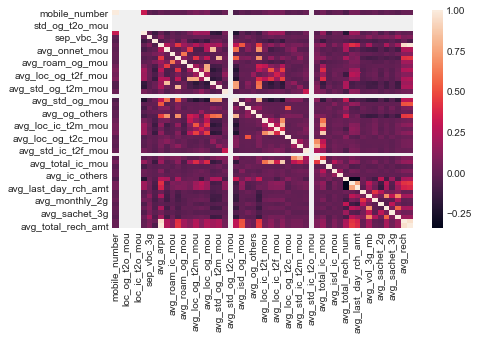

In [36]:
sns.heatmap(corrmap)

In [37]:
print(corrmap['avg_rech'].sort_values(ascending=False)[:10], '\n')
print(corrmap['avg_rech'].sort_values(ascending=False)[-10:])

avg_rech                1.000000
avg_total_rech_amt      0.958100
avg_arpu                0.947797
avg_isd_og_mou          0.514224
avg_total_og_mou        0.445064
avg_max_rech_amt        0.423785
avg_offnet_mou          0.416947
avg_last_day_rch_amt    0.363822
avg_std_og_mou          0.282572
avg_loc_og_t2m_mou      0.244060
Name: avg_rech, dtype: float64 

avg_monthly_2g       -0.004828
aon                  -0.008394
avg_spl_ic_mou       -0.017941
avg_sachet_2g        -0.022043
circle_id                  NaN
loc_og_t2o_mou             NaN
std_og_t2o_mou             NaN
loc_ic_t2o_mou             NaN
avg_std_og_t2c_mou         NaN
avg_std_ic_t2o_mou         NaN
Name: avg_rech, dtype: float64


Notice that `avg_total_rech_amt` and `avg_arpu` are highly correlated to the `avg_rech` that was used to retrieve the Churn

#### Let's remove multi-collinearity

In [38]:
telecom_final.drop(columns=['avg_total_rech_amt','avg_arpu'],axis=0, inplace=True)

In [39]:
len(telecom_final.columns)

50

## Principal Component Analysis

- Create X and y data sets 
- Test Train split
- Perform scaling
- Train and test PCA
- Check cumulative variance report for identifying PCA components
- Perform incremental PCA for efficiency
- Identify Multi-collinearity if any >?

### Create X and y data sets

In [40]:
X =telecom_final[[
       'avg_onnet_mou', 'avg_roam_ic_mou', 'avg_offnet_mou', 'avg_roam_og_mou',
       'avg_loc_og_t2t_mou', 'avg_loc_og_t2m_mou', 'avg_loc_og_t2f_mou',
       'avg_loc_og_mou', 'avg_std_og_t2t_mou', 'avg_std_og_t2m_mou',
       'avg_std_og_t2f_mou', 'avg_std_og_mou',
       'avg_isd_og_mou', 'avg_spl_og_mou', 'avg_og_others', 'avg_total_og_mou',
       'avg_loc_og_t2c_mou', 'avg_std_ic_t2t_mou',
       'avg_rech']]

# Putting response variable to y
y = telecom_final['Churn']

###  Test train split and apply Scaling

In [41]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [42]:
X_train.shape

(20985, 19)

### Apply PCA on train and test data

In [43]:
#Improting the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='auto', random_state=42)

In [44]:
#Doing the PCA on the train data
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='auto', tol=0.0, whiten=False)

### PCA Components with 2 dimensions

In [45]:
colnames = list(X.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':colnames})
pcs_df.head()

,PC1,PC2,Feature
0,0.345648,-0.036012,avg_onnet_mou
1,0.009839,-0.026071,avg_roam_ic_mou
2,0.344863,0.135005,avg_offnet_mou
3,0.047900,-0.043916,avg_roam_og_mou
4,0.124488,0.388152,avg_loc_og_t2t_mou


#### Cumulative VAriance report

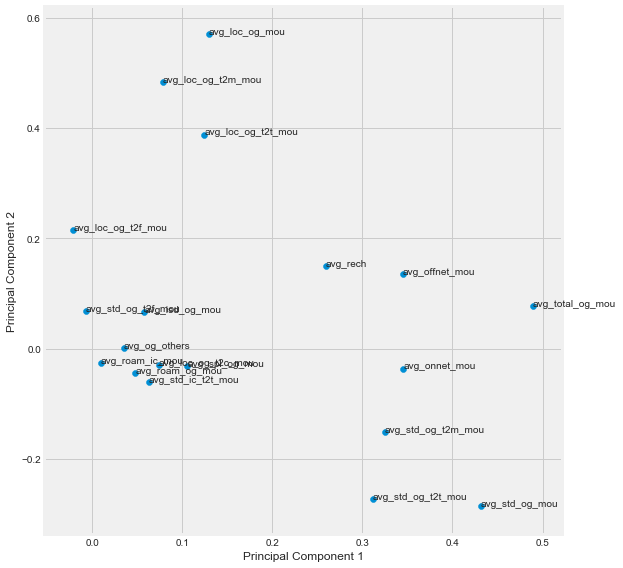

In [46]:
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(pcs_df.PC1, pcs_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC2[i]))
plt.tight_layout()
plt.show()

In [47]:
pca.explained_variance_ratio_

array([2.10524480e-01, 1.40061963e-01, 1.03382637e-01, 8.76948623e-02,
       7.91661229e-02, 7.15895160e-02, 5.93425801e-02, 5.13555193e-02,
       4.90882164e-02, 4.59478625e-02, 3.98432062e-02, 2.42403787e-02,
       2.15374376e-02, 1.60443848e-02, 1.73604213e-04, 7.22814710e-06,
       5.28986157e-12, 2.27698782e-12, 7.44936760e-13])

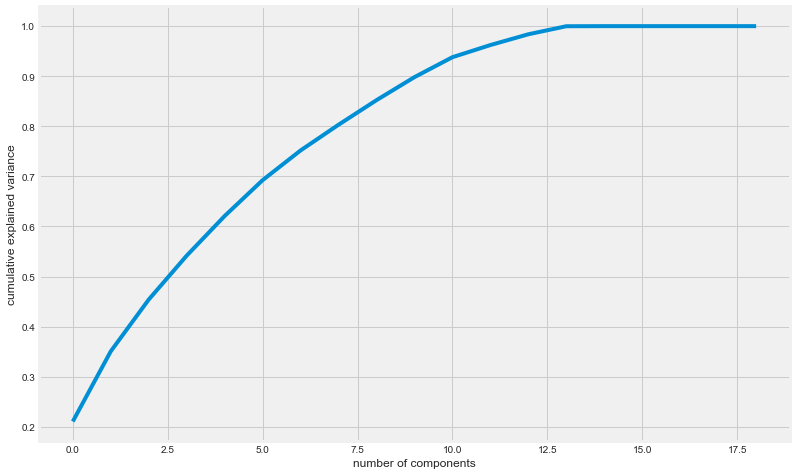

In [48]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

### Perform Incremental PCA
#### Looks like 10 components are enough to describe 90% of the variance in the dataset
- We'll choose 10 components for our modeling

In [49]:
#Using incremental PCA for efficiency
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=10)

In [50]:
train_pca = pca_final.fit_transform(X_train)
train_pca.shape

(20985, 10)

### Check Multi-collinearity ?

In [51]:
#creating correlation matrix for the principal components
corrmat = np.corrcoef(train_pca.transpose())

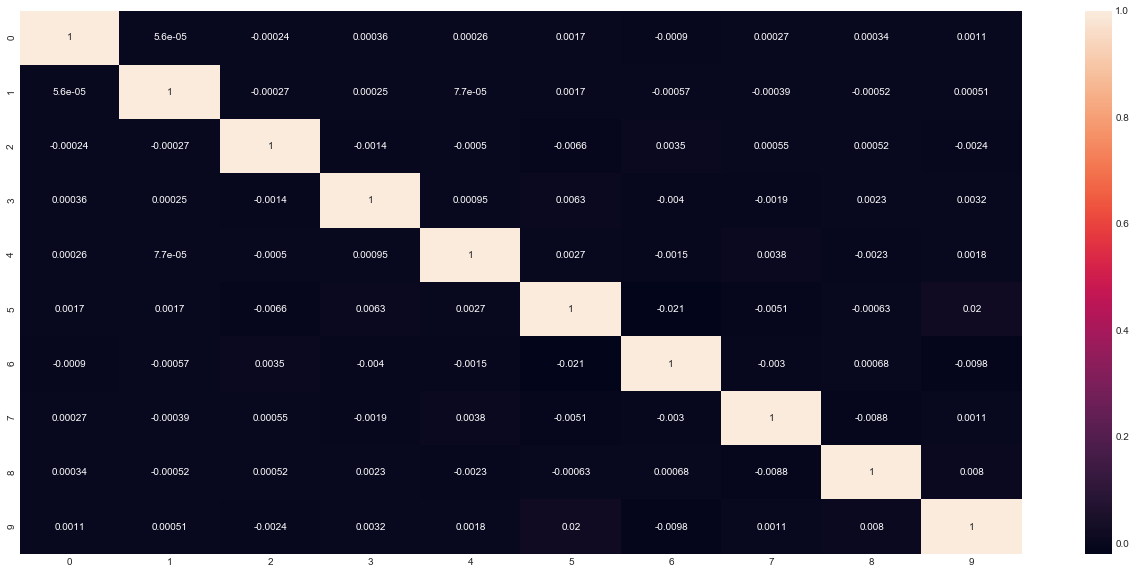

In [52]:
#plotting the correlation matrix
%matplotlib inline
plt.figure(figsize = (20,10))
sns.heatmap(corrmat,annot = True)

In [53]:
# 1s -> 0s in diagonals
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)
# we see that correlations are indeed very close to 0

max corr: 0.019855738845330092 , min corr:  -0.020719919847236153


##### There is certainly no correlation between any two components !  We effectively have removed multicollinearity, and our models will be much more stable

In [54]:
#Applying selected components to the test data - 20 components
test_pca = pca_final.transform(X_test)
test_pca.shape

(8994, 10)

## Model Building and Evaluation :  Logistic Regression

- Create logistic model
- Ingest PCA data (train and test)
- Run model on training data set
- Run model on test data set
- Confusion matrix 
- Accuracy for training and test data sets

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

learn_pca = LogisticRegression()
model_pca = learn_pca.fit(train_pca,y_train)

### Run regression model on training data set

In [56]:
y_train_pred = model_pca.predict(train_pca)
y_train_pred[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [57]:
# Let's take a look at the confusion matrix again 
from sklearn import metrics
confusion = metrics.confusion_matrix(y_train, y_train_pred)
confusion

array([[19194,    17],
       [ 1765,     9]], dtype=int64)

In [58]:
print(metrics.accuracy_score(y_train, y_train_pred))

0.9150822015725518


#### The accuracy of the training data is `92%`

### Run regression model on test data set

In [59]:
y_test_pred = model_pca.predict(test_pca)
y_test_pred[:10]

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0], dtype=int64)

In [60]:
# Let's take a look at the confusion matrix again 
from sklearn import metrics
confusion = metrics.confusion_matrix(y_test, y_test_pred)
confusion

array([[8169,   10],
       [ 810,    5]], dtype=int64)

In [61]:
print(metrics.accuracy_score(y_test, y_test_pred))

0.9088281076273071


#### The accuracy of the test data is `91%`

#### Note that post PCA,  the accuracy of the training and test data set if `92%`  and `91%` respectively.  Given that it pretty close match we can consider this model for evaluation 

## Model Building and Evaluation :  Random Forest



In [62]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=6, random_state=42)  
classifier.fit(train_pca, y_train)

# Predicting the Train and Test set results
y_pred_train_rn = classifier.predict(train_pca)  
y_pred_test_rn = classifier.predict(test_pca)  

C:\Users\gauta\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [63]:
from sklearn.metrics import confusion_matrix  
from sklearn.metrics import accuracy_score

cm_train = confusion_matrix(y_train, y_pred_train_rn)  
print(cm_train)  
print(metrics.accuracy_score(y_train, y_pred_train_rn))

cm_test = confusion_matrix(y_test, y_pred_test_rn)  
print(cm_test)  
print(metrics.accuracy_score(y_test, y_pred_test_rn))

[[19210     1]
 [ 1755    19]]
0.9163211817965213
[[8131   48]
 [ 814    1]]
0.9041583277740716


##  <font color='maroon'>Conclusions : Telecom Churn Case Study</font> 

In [64]:
final_df= pcs_df[pcs_df.Feature.index <= 20]
final_df = final_df[final_df.PC2 < 0]
labels = list(final_df.Feature)

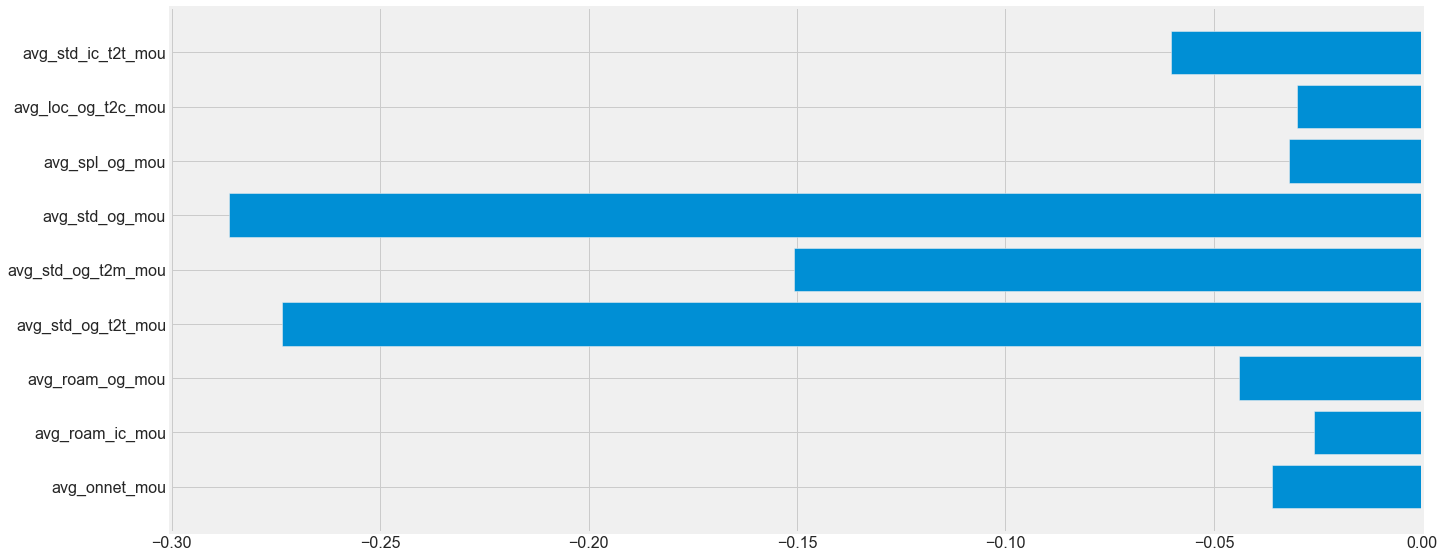

In [65]:
plt.figure(figsize = (20,10))
plt.barh(final_df['Feature'], final_df['PC2'])
plt.yticks(final_df['Feature'],labels, rotation='horizontal', fontsize=16)
plt.xticks(fontsize=16)
plt.subplots_adjust(bottom=0.15)
plt.show()

#### With the motive to determine the "attributes" that contribute for Churn customers the team has put considerable amount of effort.          Below the key attributes that have impact on churn customers for  Telecom organisation.



     We have categorized the impact as high and medium, and we have also given some ranges for the above consideration:

     * less than -0.10 will be trated as High impact variables
     * greater than -0.10 will be trated as medium impact variables

| Feature | Impact   | Remark|
|---------|----------|----------|
|   STD Outgoing MOU     | High  | This feature is the most important predictor variables to predict churn.
|   STD outgoing calls T2T  | High | The next Important feature is STD outgoing calls between the same operators.
|   STD outgoing calls T2M      | High    |This variable is also an important predicting factor for churning.
|   STD incomming calls T2T Usage  | Medium | STD incomming  minutes of usage between the networks is considered medium for                                                  the churn.
|   Roming outgoing Minutes Usage     | Medium    | Roming outgoing Minutes of usage is also considered as medium for churn.
|   OnNet Minutes of usage - voice calls| Medium| Minutes of usage on voice calls are also considered as medium value attributes                                                     for churn

#####  <font color='maroon'>Summary and Treatment</font> 

*  From the above chart we can conclude that STD outgoing calls minutes of usage is responsible for churning
   so if we can provide the std packages at more economic rates it can prevent churning of such customer base.

* Also Std outgoing calls within the same operator or with different operator is important churning variable 
  and the treatment we would like to provide economical std packages which can lower or minimize the churn.
  
